In [1]:
import config
import visual.plot as vplot
from model.sirmodel import SIRModel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv("data/covid/france/evolution_par_jour_18_06.csv", sep=",")
df.tail()

,Unnamed: 0,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,...,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
136,136,2020-06-13,pays,FRA,France,156813.0,NaN,37599.0,NaN,19014.0,...,10909.0,68.0,14.0,72808.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66751365.0
137,137,2020-06-14,pays,FRA,France,157220.0,NaN,37599.0,NaN,19023.0,...,10881.0,33.0,6.0,72859.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66750898.0
138,138,2020-06-15,pays,FRA,France,157372.0,NaN,37599.0,NaN,19052.0,...,10752.0,114.0,12.0,73044.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66750532.0
139,139,2020-06-16,pays,FRA,France,157716.0,NaN,37901.0,NaN,19090.0,...,10535.0,143.0,14.0,73335.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66749859.0
140,140,2020-06-17,pays,FRA,France,158174.0,NaN,37901.0,NaN,19118.0,...,10267.0,116.0,14.0,73667.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66749041.0


In [3]:
df = df[df["date"] < "2020-04-01"]

## Fit

In [4]:
sir = SIRModel(N=67000000, R0=0, I0=df.loc[0, "cas_confirmes"])

In [5]:
t = range(df.shape[0])
sir.fit(t, df["cas_confirmes"])

d:\dev\projects\projet_sdd\venv\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.49639779 3.33149102]


## Predict

In [6]:
# Integrate the SIR equations over the time grid, t.
t = range(100)
S, I, R = sir.predict(t)

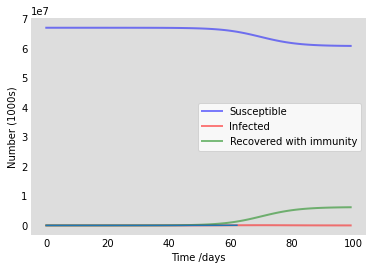

In [7]:
vplot.plot_SIR(S, I, R, t)
df["cas_confirmes"].plot()

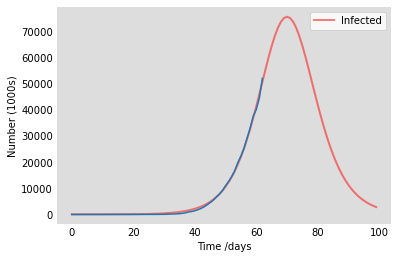

In [8]:
vplot.plot_SIR(S=None, I=I, R=None, t=t) # only I
df["cas_confirmes"].plot()